## 4.4 의사결정 트리 (decision tree)

* root node, leaf node

결정 트리의 모양은 우리가 알고 있는 나무를 거꾸로 세운 것과 같다. 또는 물에 비친 나무의 그림자를 생각해도 좋겠다. 나무의 경우 뿌리가 가장 아래에 있고 줄기와 잎이 그 위에 달려있지만 결정 트리에서는 맨 위에 있는 '노드 (node)'가 출발점 즉 뿌리노드(root node)가 된다. 모든 데이터가 다 들어있는 뿌리노드에서 적절한 조건을 만족시키는가 여부에 따라 데이터를 둘로 나눈다. 그런 과정을 거듭하다가 더 이상 가지를 나누지 않는 맨 아래편 마지막 노드들을 나뭇잎, 즉 '리프 노드(leaf node)'라고 부른다.

결정 트리는 변수 가운데 가장 중요한 변수를 하나 골라 그 변수의 값에 따라 데이터를 둘로 나누는 작업을 반복한다(큰 문제를 작은 문제로 나누어 해결하는 이런 알고리즘을 '분할 정복(divide and conquer)'알고리즘이라고도 부른다). 

### 4.4.1 의사결정트리 (이론)

스무고개 놀이와 의사결정트리 모델 : 중요한 변수를 상위 노드에 두자.

중요한 변수를 어떻게 찾을 수 있을까? 유명한 붓꽃 데이터(iris data)를 가지고 공부하자. 

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
type(iris_data)

sklearn.utils.Bunch

목적 : 붓꽃 꽃잎의 길이, 너비, 꽃받침의 길이, 너비를 가지고 붓꽃의 품종 분류.

features (독립변수) : sepal length, sepal width, petal length, petal width

label (target, 종속변수) : 3 different types of irises’ (Setosa, Versicolour, and Virginica)

In [2]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris_label = iris_data.target
print('iris target값:', iris_label)
print('iris target명:', iris_data.target_names)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [4]:
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, \
                                                       iris_data.target, test_size = 0.2, random_state = 11)

In [5]:
X_train.shape

(120, 4)

In [6]:
import numpy as np
np.bincount(y_train)

array([41, 40, 39], dtype=int64)

120개로 이루어진 iris train data(X_train)에는 네 개의 feature 변수(sepal length in cm, sepal width in cm, petal length in cm, petal width in cm)가 있다. 그리고 품종을 나타내는 길이가 120인 class 변수(Iris Setosa, Iris Versicolour, Iris Virginica)는 y_train에 들어 있다. 결정 트리는 4개의 변수 가운데 가장 중요한 변수를 하나 골라 그 변수의 값에 따라 붓꽃의 품종을 예측하는 작업을 반복한다.

중요한 변수를 찾을 때 기준으로는 지니계수와 엔트로피, 정보 이득 등이 있다.

* Gini index

아래 트리 그림은 깊이(depth)가 5인 결정트리를 보여준다. 일단 그런 트리를 만들고 나면 새로운 붓꽃 데이터가 있을 때 root node부터 시작해서 조건을 검토하여 그 붓꽃의 종류를 예측할 수 있다. 

사이킷런에서 결정 트리는 `sklearn.tree` 안에 있는` DecisionTreeClassifier()`를 이용하는데 클래스의 객체를 만들어서 `fit()`으로 모델을 구성한다. 

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156) 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

test data에서 정확도를 알아보자.

In [8]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.9333333333333333

의사결정 트리 모델에서는 그림이 매우 중요한데 보통 아래와 같이 그린다.

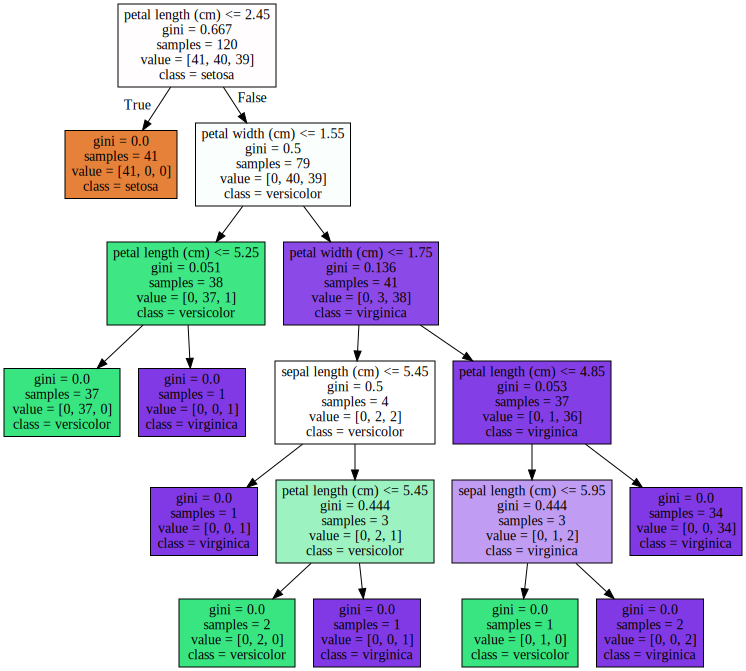

In [9]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz
 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

그 그림 맨 위의 root node 내부를 잘 살펴보자. 이 노드에는 훈련 데이터 120개가 모두 들어있다. 여기에는 세 종류의 붓꽃들이 골고루 섞여있다. 이런 상태를 가장 순수하지 않은 상태, 또는 불순도(impurity)가 가장 높은 상태라고 한다. 우리는 나무모형을 만들어 불순도가 높은 전체 데이터를 점점 순수한 데이터들로 이루어진 여러 노드들로 나누고 싶다.

    petal length (cm) <= 2.45
    gini = 0.667
    samples = 120
    value = [41, 40, 39]
    class = setosa

맨 위에 있는 `petal length(cm) <= 2.45`는 첫단계의 분류 조건을 나타낸다. 데이터가 그 조건을 만족시키면 왼쪽으로 분류하고 아니면 오른쪽으로 분류한다. 그런 조건을 어떻게 찾았을까? 조건 아래에 있는 `gini = 0.667`을 살펴보자. 흔히 '지니 계수', '지니 불순도' 등으로 불리는 이 값은 그 노드에 들어있는 데이터들이 얼마나 다양한지(또는 순수한지, 균일한지)를 나타낸다. 



결정 트리를 비롯한 분류 알고리즘은 여러가지 클래스가 섞인 데이터를 같은 클래스의 순수한 집단들로 나누려한다. 가령 root node에는 세 종류의 붓꽃이 전혀 분류되지 않은 상태로 각각 41, 40, 39개씩 들어있다. 그 노드에서 각 붓꽃 종류의 확률을 $p(i), ~ (i=1, 2, 3)$라고 할 때 다음 값을 **지니 불순도** 라고 부른다.

$$ {\rm Gini} = \sum_{i=1}^{3} p(i) (1- p(i)) = 1 - \sum_{i=1}^{3} p(i)^2 . $$

만약 $p(1)=1, p(2)=p(3)=0$이면 지니불순도 값은 0이 된다. 즉 노드 전체가 단 하나의 종류로만 이루어진 가장 순수한 노드라는 뜻이다. 따라서 지니불순도 값이 높을수록 그 노드에는 서로 다른 종류가 섞여있을 것이다. 



교재 74쪽에서 '지니계수'라고 부르는 것은 위의 식에서 $  \sum_{i=1}^{3} p(i)^2  $ 을 뜻한다. 따라서 교재의 지니계수는 불순도가 아니라 순도(purity)를 나타낸다. 그런데 교재와 같이 정의하면 'gini'값을 '불순도'라고 설명하는 89쪽의 본문과 충돌이 생길 수 있다. 따리서 앞으로 우리는 gini를 순도가 아닌 불순도를 나타내는 것으로 정의할 것이다.

root node에서는 $p(1) = 41/120, ~ p(2) = 40/120, ~ p(3)= 39/120$이므로 지니불순도 값은 

$$ {\rm Gini} = \sum_{i=1}^{3} p(i) (1- p(i)) = 0.667 $$

가 된다. 

그리고 root node의 맨 아래에 있는 `class = setosa`는 만약 그 단계에서 120개 전체 데이터를 세 종류 중 하나로 분류한다면 가장 빈도가 높은 setosa 종류로 분류하게 된다는 뜻이다. 120개 데이터를 `petal length(cm) <= 2.45`를 기준으로 둘로 나눈 결과 41:79로 분리되었고 41개 데이터는 모두 setosa 품종이므로(그래서 Gini = 0이다. 완전히 순수해졌기 때문이다) 왼쪽 노드는 더 이상 분리할 필요가 없고 두 종류가 섞여있는 오른쪽 노드의 79개만 계속 분류하면 되겠다.

나머지 노드들도 마찬가지 방법으로 해석하면 된다.

잠깐 위의 지니값을 파이썬으로 계산하는 연습도 해보자.

In [ ]:
gini = 0
bin = np.bincount(y_train)
for k in range(len(bin)):
  p = bin[k]/sum(bin)
  gini += p * (1-p)
print(gini)

* entropy, information gain

지니 계수 이외에 사이킷런에서는 데이터의 혼잡도를 의미하는 entropy를 기준으로 분류할 수도 있다. 참고로 root node의 entropy는 다음과 같이 계산한다.

$$ {\rm Entropy} = - \sum_{i=1}^{3} p(i) \cdot \log_{2} (p(i)) = 1.585 $$

나무가 아래로 내려갈수록 엔트로피는 줄어들 것이다. 이러한 엔트로피 값의 변화를 정보이득(information gain)이라고 부른다.

base가 2인 로그값을 계산하는 Numpy 함수는 `np.log2()`이므로 위의 엔트로피 계산은 아래와 같이 확인할 수 있다. 

In [ ]:
p = [41/120, 40/120, 39/120]
hap = 0
for x in p:
    plogp = -(x * np.log2(x))
    hap += plogp
print(hap)

**참고**
gini 대신 entropy를 기준으로 하려면 DecisionTreeClassifier 객체를 만들 때  `criterion= 'entropy'`라고 지정하면 된다.

In [ ]:
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=156)
dt_clf.fit(X_train , y_train)

test data에서 정확도를 알아보자.

In [10]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.9333333333333333

### [참고] 결정 트리 모델의 시각화(Decision Tree Visualization)

iris dataset으로 결정 트리 모델 학습과 검증 연습을 해보자. 결정 트리 모델에서는 위의 나무 그림과 같이 분류과정을 보여주는 시각화가 중요한데 사이킷런에서는 두 가지 방법을 이용할 수 있다. 

하나는 `plot_tree()` 함수를 이용하는 것이고 다른 하나는 `Graphviz` 패키지를 이용하는 것이다. 먼저 iris 데이터를 train, test 데이터 둘로 나눈 다음  DecisionTreeClassifier() 객체를 만들어 `fit()`으로 모델을 훈련시켜보자.


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)


먼저 `sklearn.tree`에 들어있는 `plot_tree()` 함수를 이용해서 트리를 그려보자.

[Text(103.01538461538462, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(77.26153846153846, 163.07999999999998, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(128.76923076923077, 163.07999999999998, 'X[3] <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(51.50769230769231, 126.83999999999999, 'X[2] <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(25.753846153846155, 90.6, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(77.26153846153846, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(128.76923076923077, 90.6, 'X[0] <= 5.45\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(103.01538461538462, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(128.769230769

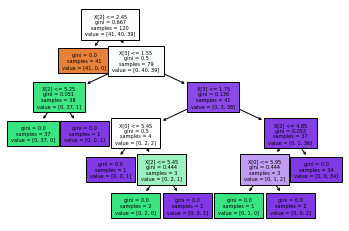

In [13]:
from sklearn.tree import plot_tree
plot_tree(dt_clf, filled=True, fontsize=5)



그림이 제대로 보이지도 않는다. 이번에는 graph visualization software [Graphviz](https://graphviz.org/)를 이용해서 다시 그려보자. Jupyter notebook에서 Graphviz를 이용하려면 prompt에서 아래와 같이 입력해서 패키지를 설치해야한다. (Colab에서는 설치할 필요없다).

`conda install python-graphviz`

그런 다음 아래와 같이 sklearn.tree 안에 있는 export_graphviz() 함수를 부른다. 이 함수는 `out_file=" "`에서 지정한 이름의 dot 언어로 된 .dot 파일을 만들어준다. Graphviz는 이렇게 만든 dot 파일을 읽어들여서 그래프로 시각화한다. 

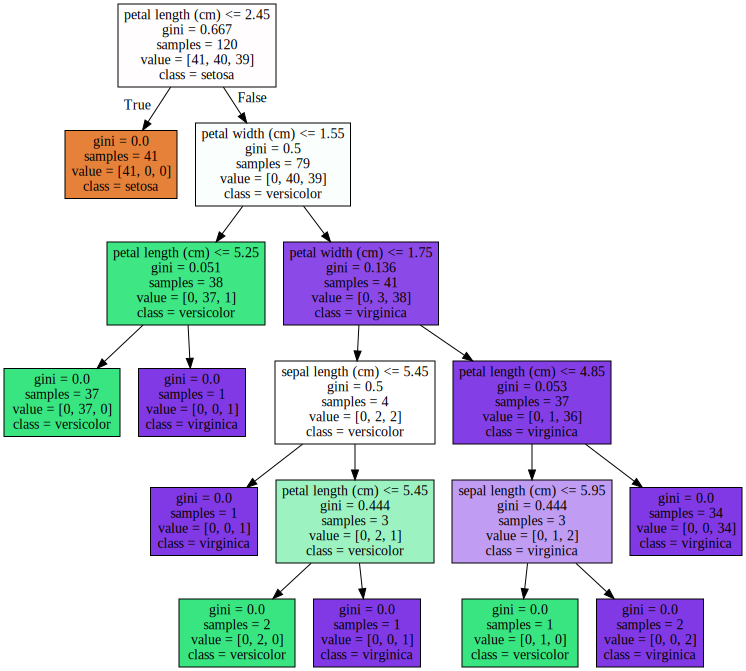

In [10]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names ,
feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* 결정 트리 모델의 특징과 parameter
 + 결정트리의 가장 큰 단점은 과대적합의 위험이 크다는 점이다. 즉 나무가 너무 복잡해질 수 있다는 것이다. 이러한 과대적합 문제를 피하기 위해 몇 가지 parameter를 지정할 수 있는데 특히 max_depth, min_samples_split, min_samples_leaf 등이 중요하게 쓰인다.    
   - max_depth는 최대 깊이, 
   + min_samples_split는 더 이상 분리하지 않을 최소 데이터수,
   + min_samples_leaf는 최종 leaf node가 될 수 있는 최소 데이터 수를 의미한다. 

iris data에 대해 `max_depth = 3`으로 두고 tree를 만들어서 그래프로 그려보자.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf2 = DecisionTreeClassifier(max_depth = 3, random_state=156)
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

dt_clf2.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

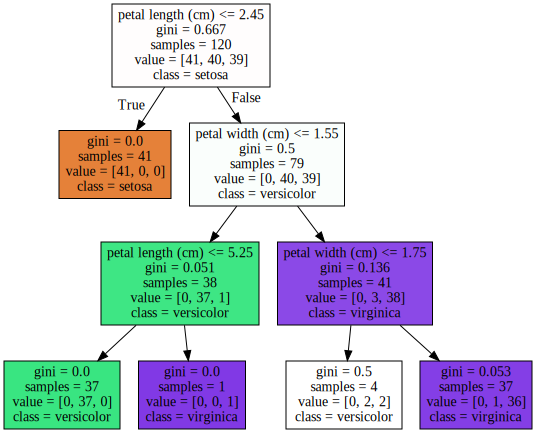

In [12]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf2, out_file="tree2.dot", class_names=iris_data.target_names ,
feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [13]:
from sklearn.metrics import accuracy_score
pred2 = dt_clf2.predict(X_test)
acc2 = accuracy_score(y_test, pred2)
acc2

0.9333333333333333

max_depth를 따로 지정하지 않았을 때 나무의 depth는 5였는데 max_depth = 3으로 지정한 결과 나무가 더 간단해졌다.

최적 max_depth 값을 찾기 위해 GridSearchCV()를 이용해보자. 

In [14]:
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier(random_state=156)
params = {'max_depth' : [ 1, 2, 3, 4, 5, 6, 8 ,10]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 hyper parameter:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치:0.9583
GridSearchCV 최적 hyper parameter: {'max_depth': 3}


GridSearchCV객체의 `cv_results_` 속성을 DataFrame으로 만들고 여러 max_depth 값에서 평균 정확도를 비교해보자. 

In [15]:
import pandas as pd
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,1,0.675000
1,2,0.950000
2,3,0.958333
3,4,0.950000
4,5,0.950000
5,6,0.950000
6,8,0.950000
7,10,0.950000


max_depth = 3일 때 가장 정확도가 높다. 이번에는 test data를 이용해서 여러 max_depth 값에서 성능을 비교해보자. 

In [16]:
max_depths = [ 1, 2, 3, 4, 5, 6, 8 ,10]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 1 정확도: 0.6333
max_depth = 2 정확도: 0.8667
max_depth = 3 정확도: 0.9333
max_depth = 4 정확도: 0.9333
max_depth = 5 정확도: 0.9333
max_depth = 6 정확도: 0.9333
max_depth = 8 정확도: 0.9333
max_depth = 10 정확도: 0.9333


max_depth = 3일때 정확도가 가장 높으며 depth 값을 더 올려도 성능이 좋아지지 않는다.

이번에는 `min_samples_leaf` 값을 바꿔보자.

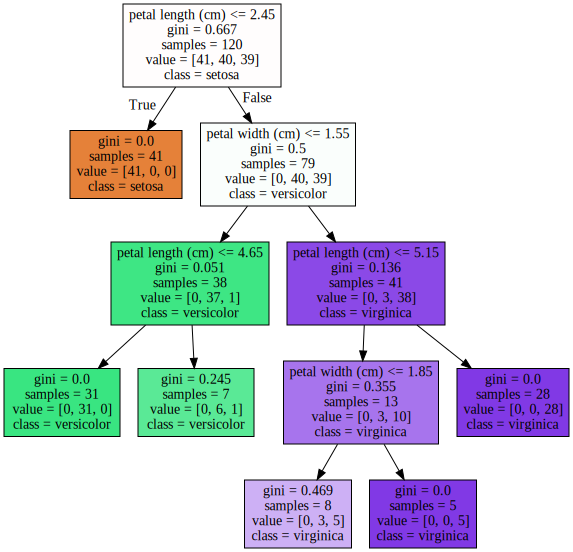

In [17]:
dt_clf3 = DecisionTreeClassifier(min_samples_leaf = 5, random_state=156)
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

dt_clf3.fit(X_train , y_train)

export_graphviz(dt_clf3, out_file="tree3.dot", class_names=iris_data.target_names ,
feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


`min_samples_leaf = 5`으로 지정했기 때문에 지니계수 값이 크더라도 데이터 수가 5보다 작은 leaf node는 불가능해지고 결국 나무가 간단해진다. 이 값을 크게 할수록 나무는 점점 간단해진다.

In [18]:
from sklearn.metrics import accuracy_score
pred3 = dt_clf3.predict(X_test)
acc3 = accuracy_score(y_test, pred3)
acc3

0.8666666666666667

마지막으로 GridSearchCV를 이용하여 `max_depth`와 `min_samples_leaf` 값을 같이 바꾸면서 정확도를 비교해보자.

In [19]:
params = {'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf' : [3, 4, 5, 6, 7, 8, 10, 12]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5)
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치: 0.9500
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 2, 'min_samples_leaf': 3}


선택된 parameter로 test data에서 예측 정확도를 구해보자.

In [20]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8667
